# Signal processing
    Here we will make an attempt to simulate signal obtaining and will try to remove noize from the signal. 
    Let's consider any waives with frequencies >100 rad/s to be noize, and we will remove them from initial signal using discrete fourier transform.
    

In [5]:
%matplotlib inline

    First we would like to have a couple of procedures, which will simulate the signal. We will generate 5 sine waives with low frequency and another 5 with high frequency (noize)

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random


def getHarmonic(a, freq, phi=0):
    return lambda x: a*np.sin(freq*2*np.pi*x + phi)


def initInputSignal(n, T):
    t = np.linspace(0, T, n)
    y = np.zeros(n)
    for i in range(5):
        freq = random.randint(1, 16)
        amplitude = random.randint(1, 16)
        hiFreq = freq * 32
        hiAmplitude = random.randint(1, 16)
        y += getHarmonic(amplitude, freq)(t) + getHarmonic(hiAmplitude, hiFreq)(t)
    return t, y

    Now we will simulate signal obtaining. 

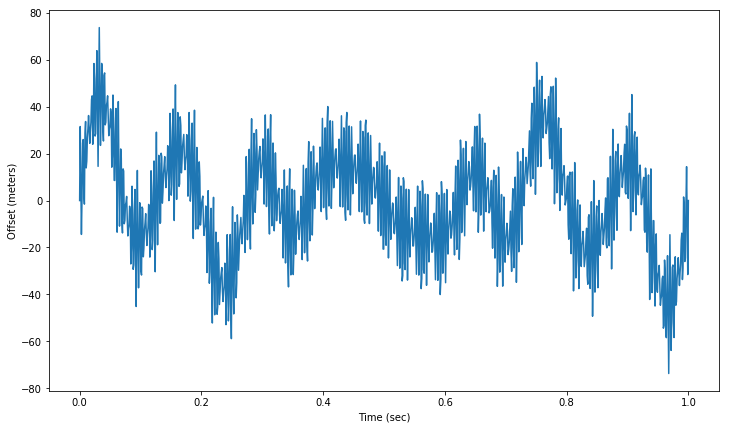

In [55]:
n = 1024
T = 1
t, y = initInputSignal(n, T)
plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Offset (meters)')
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()


    Now we will apply fourier transform and remove all high-frequency fluctuations (noize). Everything with frequency 
    greater than 100 rad/sec we will consider as latter

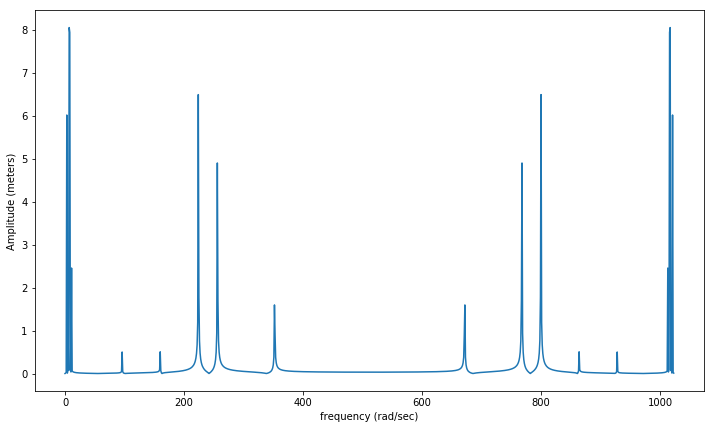

In [61]:
transform = np.fft.fft(y)
plt.plot(np.array(range(n))/T, abs(transform)/n)
plt.xlabel('frequency (rad/sec)')
plt.ylabel('Amplitude (meters)')
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

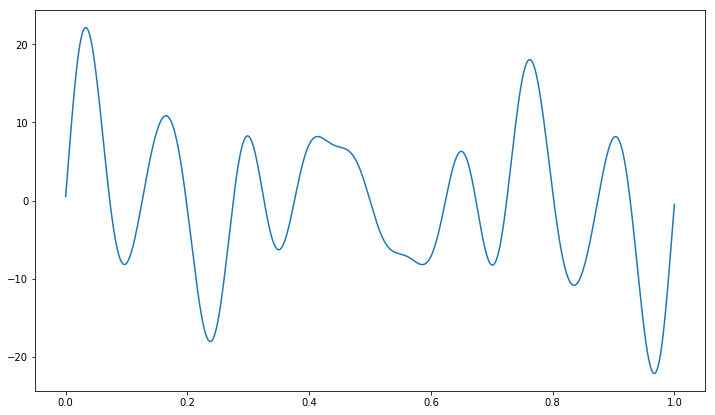

In [69]:
cleared = list(transform[:50]) + list(np.zeros(n - 50))    # 50 not 100 to make picture more demonstrative
inversed = np.fft.ifft(cleared)
plt.plot(t, inversed)
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()